### Hipótese 1 (MLPRegressor)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível prever o número de vendas globais de um game baseado no seu gênero, rating, publisher e plataforma?

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [3]:
all_genres = df.loc[:,'Action':'Strategy'].copy()
all_ratings = df.loc[:,'AO':'T'].copy()
all_platforms = df.loc[:,'2600':'XOne'].copy()
all_publishers = df.loc[:,'10TACLE Studios':'responDESIGN'].copy()
genres_and_ratings = all_genres.join(all_ratings).copy()
platforms_and_publishers = all_platforms.join(all_publishers).copy()

X = genres_and_ratings.join(platforms_and_publishers).copy()
y = df["Global_Sales"].copy()

In [4]:
mlp = MLPRegressor()
mlp_scores = []

kf = KFold(n_splits = 20, shuffle = True, random_state = 42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mlp.fit(X_train, y_train)
    mlp_scores.append(mlp.score(X_test, y_test))
    
print("Média acertos da MLPRegressor:",np.mean(mlp_scores))

Média acertos da MLPRegressor: -0.09646263139477321


Melhor resultado obtido:  0.15880364345396447


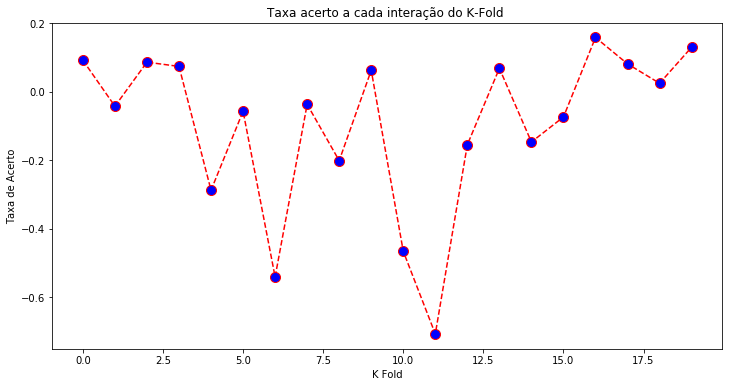

In [5]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, len(mlp_scores)), mlp_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto a cada interação do K-Fold ')  
plt.xlabel('K Fold')  
plt.ylabel('Taxa de Acerto')
print("Melhor resultado obtido: ",max(mlp_scores))

### Parâmetros da MLPRegressor:
- hidden_layer_sizes => The ith element represents the number of neurons in the ith hidden layer.
- learning_rate => Learning rate schedule for weight updates.
        ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
        ‘invscaling’ gradually decreases the learning rate learning_rate_ at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
        ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
- learning_rate_init => The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
- max_iter => Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
- tol => Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, convergence is considered to be reached and training stops.

In [6]:
# Variando os parâmetros

mlp_1 = MLPRegressor(hidden_layer_sizes=(5,))
mlp_2 = MLPRegressor(hidden_layer_sizes=(25,))
mlp_3 = MLPRegressor(hidden_layer_sizes=(50,))
mlp_4 = MLPRegressor(hidden_layer_sizes=(75,))
mlp_5 = MLPRegressor(hidden_layer_sizes=(100,))
mlp_6 = MLPRegressor(learning_rate='invscaling')
mlp_7 = MLPRegressor(learning_rate='adaptive')
mlp_8 = MLPRegressor(learning_rate_init=0.1)
mlp_9 = MLPRegressor(learning_rate_init=0.01)
mlp_10 = MLPRegressor(learning_rate_init=0.0001)
mlp_11 = MLPRegressor(max_iter=400)
mlp_12 = MLPRegressor(max_iter=600)
mlp_13 = MLPRegressor(max_iter=800)
mlp_14 = MLPRegressor(max_iter=1000)
mlp_15 = MLPRegressor(tol=0.01)
mlp_16 = MLPRegressor(tol=0.001)
mlp_17 = MLPRegressor(tol=0.00001)

scores_mlp_1 = []
scores_mlp_2 = []
scores_mlp_3 = []
scores_mlp_4 = []
scores_mlp_5 = []
scores_mlp_6 = []
scores_mlp_7 = []
scores_mlp_8 = []
scores_mlp_9 = []
scores_mlp_10 = []
scores_mlp_11 = []
scores_mlp_12 = []
scores_mlp_13 = []
scores_mlp_14 = []
scores_mlp_15 = []
scores_mlp_16 = []
scores_mlp_17 = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    mlp_1.fit(X_train, y_train)
    scores_mlp_1.append(mlp_1.score(X_test, y_test))
    
    mlp_2.fit(X_train, y_train)
    scores_mlp_2.append(mlp_2.score(X_test, y_test))
    
    mlp_3.fit(X_train, y_train)
    scores_mlp_3.append(mlp_3.score(X_test, y_test))
    
    mlp_4.fit(X_train, y_train)
    scores_mlp_4.append(mlp_4.score(X_test, y_test))
    
    mlp_5.fit(X_train, y_train)
    scores_mlp_5.append(mlp_5.score(X_test, y_test))
    
    mlp_6.fit(X_train, y_train)
    scores_mlp_6.append(mlp_6.score(X_test, y_test))
    
    mlp_7.fit(X_train, y_train)
    scores_mlp_7.append(mlp_7.score(X_test, y_test))
    
    mlp_8.fit(X_train, y_train)
    scores_mlp_8.append(mlp_8.score(X_test, y_test))
    
    mlp_9.fit(X_train, y_train)
    scores_mlp_9.append(mlp_9.score(X_test, y_test))
    
    mlp_10.fit(X_train, y_train)
    scores_mlp_10.append(mlp_10.score(X_test, y_test))
    
    mlp_11.fit(X_train, y_train)
    scores_mlp_11.append(mlp_11.score(X_test, y_test))
    
    mlp_12.fit(X_train, y_train)
    scores_mlp_12.append(mlp_12.score(X_test, y_test))
    
    mlp_13.fit(X_train, y_train)
    scores_mlp_13.append(mlp_13.score(X_test, y_test))
    
    mlp_14.fit(X_train, y_train)
    scores_mlp_14.append(mlp_14.score(X_test, y_test))
    
    mlp_15.fit(X_train, y_train)
    scores_mlp_15.append(mlp_15.score(X_test, y_test))
    
    mlp_16.fit(X_train, y_train)
    scores_mlp_16.append(mlp_16.score(X_test, y_test))
    
    mlp_17.fit(X_train, y_train)
    scores_mlp_17.append(mlp_17.score(X_test, y_test))
    
best_scores_foreach_configuration = []
best_scores_foreach_configuration.append(max(scores_mlp_1))
best_scores_foreach_configuration.append(max(scores_mlp_2))
best_scores_foreach_configuration.append(max(scores_mlp_3))
best_scores_foreach_configuration.append(max(scores_mlp_4))
best_scores_foreach_configuration.append(max(scores_mlp_5))
best_scores_foreach_configuration.append(max(scores_mlp_6))
best_scores_foreach_configuration.append(max(scores_mlp_7))
best_scores_foreach_configuration.append(max(scores_mlp_8))
best_scores_foreach_configuration.append(max(scores_mlp_9))
best_scores_foreach_configuration.append(max(scores_mlp_10))
best_scores_foreach_configuration.append(max(scores_mlp_11))
best_scores_foreach_configuration.append(max(scores_mlp_12))
best_scores_foreach_configuration.append(max(scores_mlp_13))
best_scores_foreach_configuration.append(max(scores_mlp_14))
best_scores_foreach_configuration.append(max(scores_mlp_15))
best_scores_foreach_configuration.append(max(scores_mlp_16))
best_scores_foreach_configuration.append(max(scores_mlp_17))

best_scores_foreach_configuration

[0.13960294267324969,
 0.14070110724924545,
 0.16090352266351593,
 0.14806215683080237,
 0.13180047664451755,
 0.11745265418547313,
 0.11282108870656625,
 0.15777717410496273,
 0.22826977609208887,
 0.0003088636382874155,
 0.1330810205471814,
 0.11251516839866305,
 0.12576786359977987,
 0.11257794069988535,
 0.11064562832400449,
 0.1216071828113261,
 0.12991673531303094]

In [8]:
mlps = [mlp_1, mlp_2, mlp_3, mlp_4, mlp_5, mlp_6, mlp_7, mlp_8, mlp_9, mlp_10, mlp_11, mlp_12, mlp_13, mlp_14, mlp_15, mlp_16, mlp_17]
best_score = max(best_scores_foreach_configuration)
best_mlp = mlps[best_scores_foreach_configuration.index(best_score)]
best_mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)